In [67]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import losses, regularizers
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
def make_frames(data, dt = 0.1):
    # first four entries x. Next four y.
    x, vx, vy, y = data
    return np.hstack((x+vx*np.arange(-3,1)*dt, y+vy*np.arange(0,4)*dt))

In [22]:
t = 2
evolv_matrix = np.array([[1, t, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, -t, -1]])

## x' = x + vx*t
## vx' = vx
## vy' = -vy
## y' = -(y+vy*t)

In [23]:
data_zero = np.random.rand(5000,4)*np.array([1,1,-1,1])+np.array([0.5,0.5,-0.5,0.5]) # v_y negative, v_y<0.5. Wall is y=0
data_t = (evolv_matrix@data_zero.T).T

In [24]:
frames_zero = np.array([make_frames(data_zero[i]) for i in range(len(data_zero))])
frames_t = np.array([make_frames(data_t[i]) for i in range(len(data_t))])

In [25]:
X_train =frames_zero[:len(frames_zero)*4//5]
Y_train = frames_t[:len(frames_zero)*4//5]
X_test = frames_zero[len(frames_zero)*4//5:]
Y_test = frames_t[len(frames_zero)*4//5:]

In [32]:
model = Sequential()
#model.add(Dense(8, input_dim=int(8), activation='relu'))
model.add(Dense(2, input_dim=int(8), activation='relu'))
model.add(Dense(2, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(int(8)))
sgd = SGD(lr=0.2, decay=1e-4)

model.compile(optimizer=sgd,
              loss=losses.mean_squared_error,
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=150,batch_size=64)

Epoch 1/150
4000/4000 [==============================] - 0s 69us/step - loss: 0.8808 - acc: 0.7085
Epoch 2/150
4000/4000 [==============================] - 0s 9us/step - loss: 0.3831 - acc: 0.8748
Epoch 3/150
4000/4000 [==============================] - 0s 9us/step - loss: 0.3765 - acc: 0.8762
Epoch 4/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.3705 - acc: 0.8787
Epoch 5/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.3481 - acc: 0.8518
Epoch 6/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.3273 - acc: 0.8187
Epoch 7/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.3222 - acc: 0.8017
Epoch 8/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.2919 - acc: 0.8750
Epoch 9/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.3115 - acc: 0.9365
Epoch 10/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.2807 - acc: 0.9592
Epoch 11/150
4000/

4000/4000 [==============================] - 0s 9us/step - loss: 0.0019 - acc: 0.9933
Epoch 84/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.0012 - acc: 0.9940
Epoch 85/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.0011 - acc: 0.9968
Epoch 86/150
4000/4000 [==============================] - 0s 8us/step - loss: 0.0010 - acc: 0.9952
Epoch 87/150
4000/4000 [==============================] - 0s 8us/step - loss: 5.2578e-04 - acc: 0.9978
Epoch 88/150
4000/4000 [==============================] - 0s 8us/step - loss: 6.7330e-04 - acc: 0.9960
Epoch 89/150
4000/4000 [==============================] - 0s 8us/step - loss: 5.0410e-04 - acc: 0.9968
Epoch 90/150
4000/4000 [==============================] - 0s 8us/step - loss: 4.6165e-04 - acc: 0.9970
Epoch 91/150
4000/4000 [==============================] - 0s 8us/step - loss: 4.0822e-04 - acc: 0.9975
Epoch 92/150
4000/4000 [==============================] - 0s 8us/step - loss: 4.1700e-04 - acc: 0.9965

In [33]:
get_encoder_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
get_decoder_input = K.function([model.layers[0].input],
                                  [model.layers[1].output])

In [34]:
get_encoder_output([X_train[:1]])[0]

array([[1.529591 , 1.7568989]], dtype=float32)

In [35]:
get_decoder_input([X_train[:1]])[0]

array([[3.2955775, 2.4150686]], dtype=float32)

In [36]:
X_train[0]

array([0.19593659, 0.33731669, 0.47869679, 0.6200769 , 1.2366937 ,
       1.0955375 , 0.95438131, 0.81322511])

In [ ]:
def slope(vec):
    return (vec[-1]-vec[4])/(vec[3]-vec[0])
def intersect(vec):
    return vec[4]-(vec[-1]-vec[4])/(vec[3]-vec[0])*vec[0]

<IPython.core.display.Javascript object>


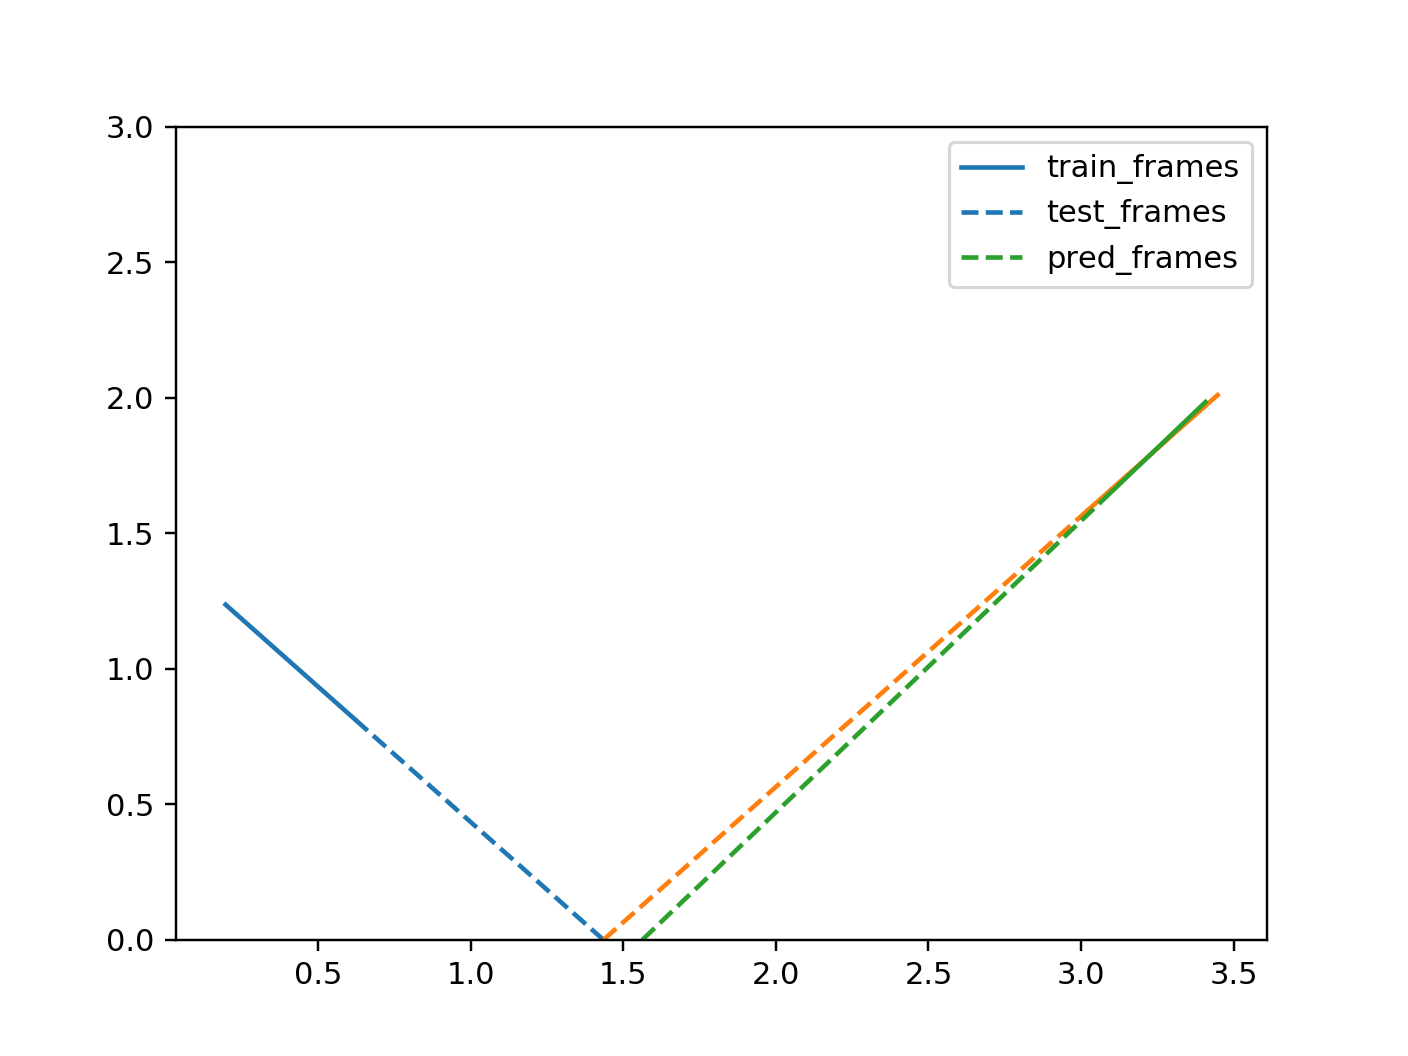

In [68]:
i=0
pred = model.predict(X_train[i:i+1])[0]

plt.plot(X_train[0][:4],X_train[0][4:], color = 'C0', label = 'train_frames')
plt.plot(Y_train[0][:4],Y_train[0][4:], color = 'C1')

plt.plot([X_train[0][3], X_train[0][3] - X_train[0][-1]/slope(X_train[0])], [X_train[0][-1], 0],'--', color = 'C0',
        label = 'test_frames')
plt.plot([X_train[0][3] - X_train[0][-1]/slope(X_train[0]), Y_train[0][0]], [0, Y_train[0][4]],'--', color = 'C1')



plt.plot(pred[:4],pred[4:], color = 'C2')
plt.plot([pred[0] - pred[4]/slope(pred), pred[0]], [0, pred[4]],'--', color = 'C2', label = 'pred_frames')

plt.ylim(0,3)
plt.legend()